## NAMA    : AGUNG REYNALDI AVIZENA <BR>NIM     : 1103204044 <BR>TUGAS KE - 2 

## <center> LIBRARY IMPORT </center>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

## <center> DATA PREPEARATION </center>

In [33]:
# Memuat Data
data = pd.read_csv('delivery.csv')
print(data.head())
data.shape

   n.prod  distance  delTime
0       7       560    16.68
1       3       220    11.50
2       3       340    12.03
3       4        80    14.88
4       6       150    13.75


(25, 3)

## <center> DATA VISUALIZATION </center>

,n.prod,distance,delTime
n.prod,1.000000,0.824215,0.964615
distance,0.824215,1.000000,0.891670
delTime,0.964615,0.891670,1.000000


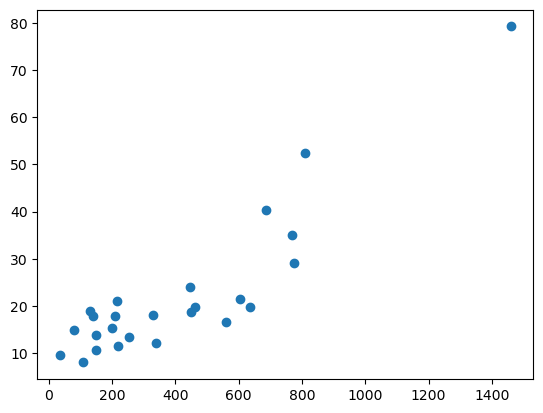

In [34]:

plt.scatter(data['distance'], data['delTime'])
data.corr()

In [35]:
x_distance = data['distance']
X_distance = x_distance[:, np.newaxis]
y_delivery = data['delTime'].values

reggresor = LinearRegression()
model = reggresor.fit(X_distance, y_delivery)
                      

C:\Users\agung\AppData\Local\Temp\ipykernel_10352\3528343966.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_distance = x_distance[:, np.newaxis]


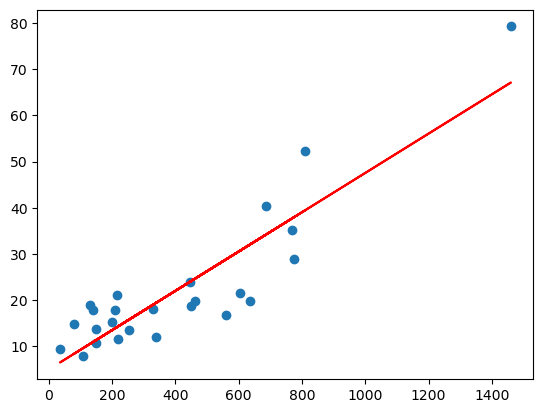

In [36]:
plt.scatter(X_distance, y_delivery)

y_pred = reggresor.predict(X_distance)
plt.plot(X_distance, y_pred, color='red')

In [37]:
X_baru = np.array([[35]])
y_pred = reggresor.predict(X_baru)
print(y_pred)

[6.45109103]


In [38]:
reggresor.score(X_distance, y_delivery)

0.7950755275911866